In [1]:
import os
from PIL import Image

In [25]:
from ipfml.processing.segmentation import divide_in_blocks
from ipfml.processing import transform, compression
from ipfml.utils import get_entropy, normalize_arr, normalize_arr_with_range

In [26]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

### Bathroom problem

In [89]:
def load_data(scene_path, selected_blocks):
    scene_images = sorted(os.listdir(scene_path))

    blocks_data = {}

    for img in scene_images:
        img_path = os.path.join(scene_path, img)
        img_data = Image.open(img_path)
        blocks = divide_in_blocks(img_data, (200, 200))

        for b in selected_blocks:
            if b not in blocks_data:
                blocks_data[b] = []

            selected_block = blocks[b]

            # now process segmentation data
            w_b, w_h, begin, end = 20, 20, 0, 20

            l_image = transform.get_LAB_L(selected_block)
            sub_blocks = divide_in_blocks(l_image, (w_b, w_h))

            entropies = []

            for sb in sub_blocks:
                sigma = compression.get_SVD_s(sb)
                entropies.append(get_entropy(sigma[begin:end]))

            blocks_data[b].append(entropies)
    return blocks_data

In [90]:
bathroom_scene_path = "/home/jbuisine/Documents/Thesis/Development/thesis-data/SIN3D_dataset/p3d_bathroom-view0_part6/"
selected_blocks = [8, 9]
bathroom_blocks = load_data(bathroom_scene_path, selected_blocks)

In [172]:
arc_scene_path = "/home/jbuisine/Documents/Thesis/Development/thesis-data/SIN3D_dataset/p3d_arcsphere-view0_part6/"
selected_blocks = [7]
arc_blocks = load_data(arc_scene_path, selected_blocks)

In [173]:
def display_svd_block(interval, data):
    x_i, y_i, = interval
    print(f"Data are in range [{(x_i+1)*20}, {(y_i+1)*20}[")
    
    #if x_i < seq:
    #    raise f"x_i cannot be < of seq"
    plt.figure(figsize=(20,10))
    for i in range(x_i, y_i, 1):
        
        # need to normalize by sequence
        cdata = np.array(data[i], 'float32')
        #_, f = cdata.shape
        #for i in range(f):
            #final_arr[index][]
        #    cdata[:, i] = normalize_arr_with_range(cdata[:, i])
        
        plt.plot(cdata, label=f'{i * 20} samples')
    plt.legend()
    plt.show()

In [203]:
def display_svd_block_seq(x_i, data, seq, output_name):
    print(f"Data are in range [{(x_i-seq)*20}, {(x_i+1)*20}[")
    
    #if x_i < seq:
    #    raise f"x_i cannot be < of seq"
    plt.figure(figsize=(20,10))
    
        
    # need to normalize by sequence
    cdata = np.array(data[x_i - seq:x_i], 'float32')
    s, f = cdata.shape
    for i in range(f):
        cdata[:, i] = normalize_arr_with_range(cdata[:, i])
     
    for i in range(s):
        plt.plot(cdata[i], label=f'{(x_i + i) * 20} échantillons', lw=3)
    
    plt.ylabel("SVD-Entropy normalisée (snorm)", fontsize=28)
    plt.xlabel("Indices sous-bloc", fontsize=28)
    plt.yticks(fontsize=22)
    plt.xticks(fontsize=22)
    plt.legend(fontsize=23, bbox_to_anchor = (1.02, 1.17), ncol=4)
    plt.savefig(output_name, dpi=200)

### Bathroom blocs

Data are in range [620, 820[


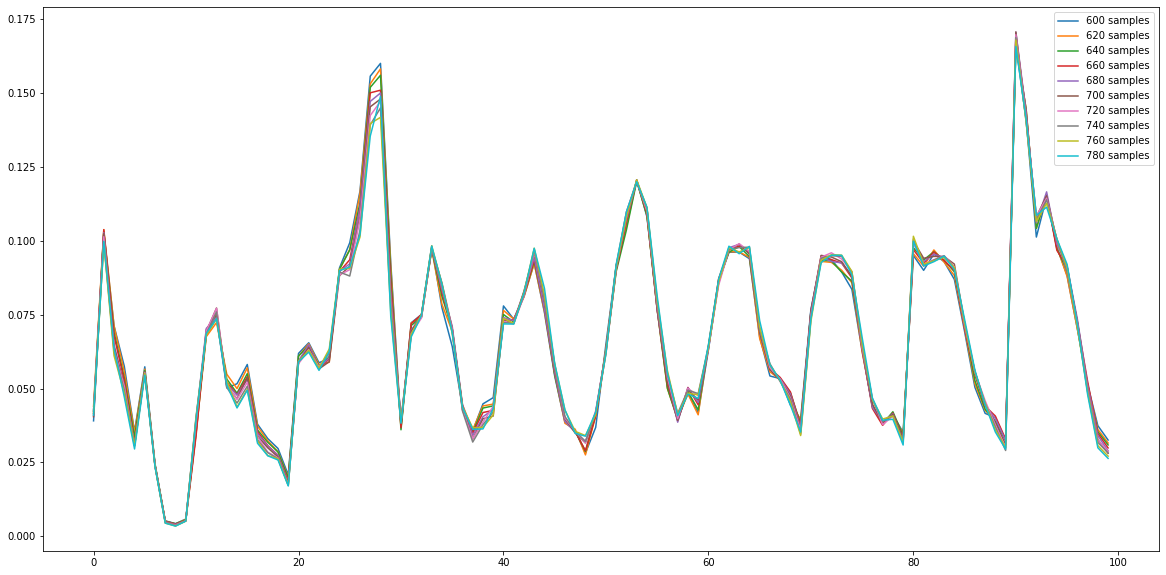

In [210]:
display_svd_block((30, 40), bathroom_blocks[9])

Data are in range [220, 420[


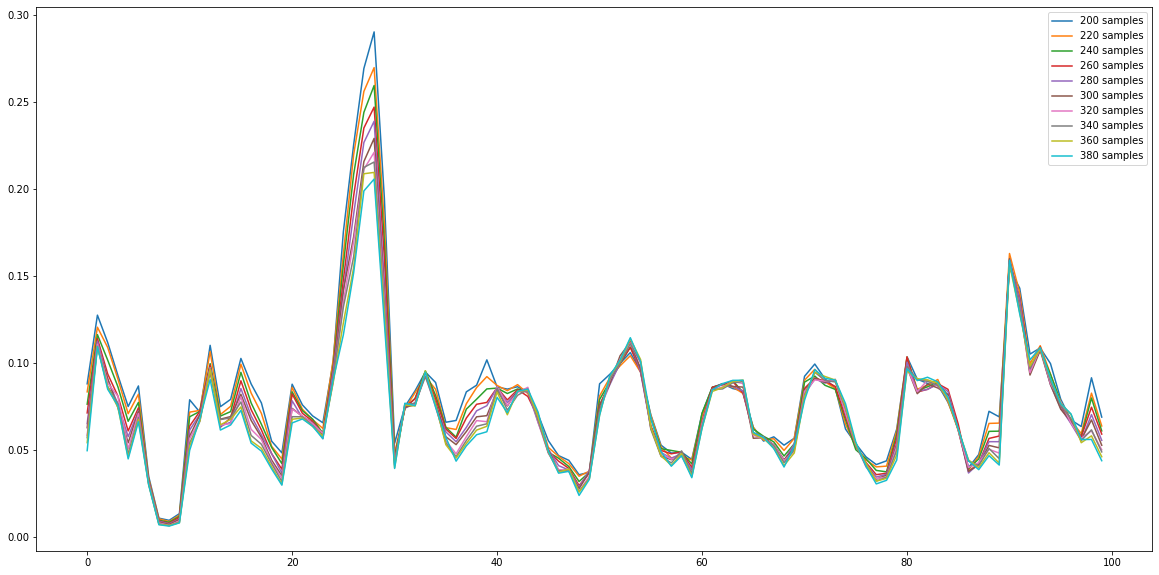

In [211]:
display_svd_block((10, 20), bathroom_blocks[9])

Data are in range [1220, 1420[


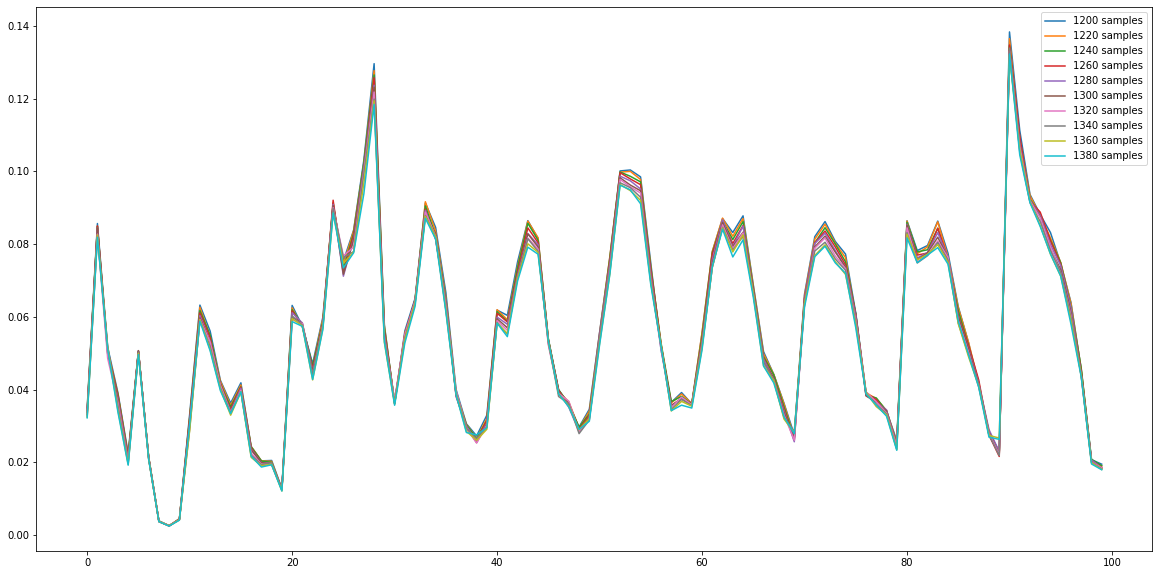

In [212]:
display_svd_block((60,70), bathroom_blocks[9])

Data are in range [400, 580[


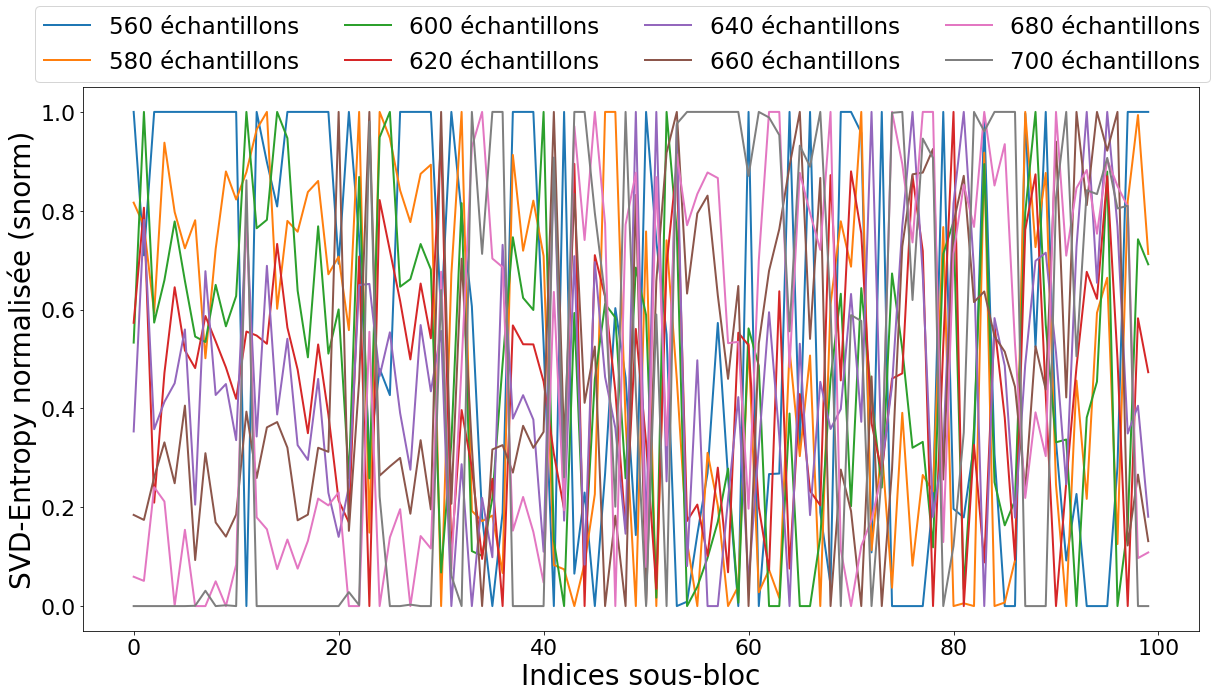

In [219]:
# during problem
display_svd_block_seq(28, bathroom_blocks[9], 8, "bathroom_bloc10_during_problem.png")

Data are in range [40, 220[


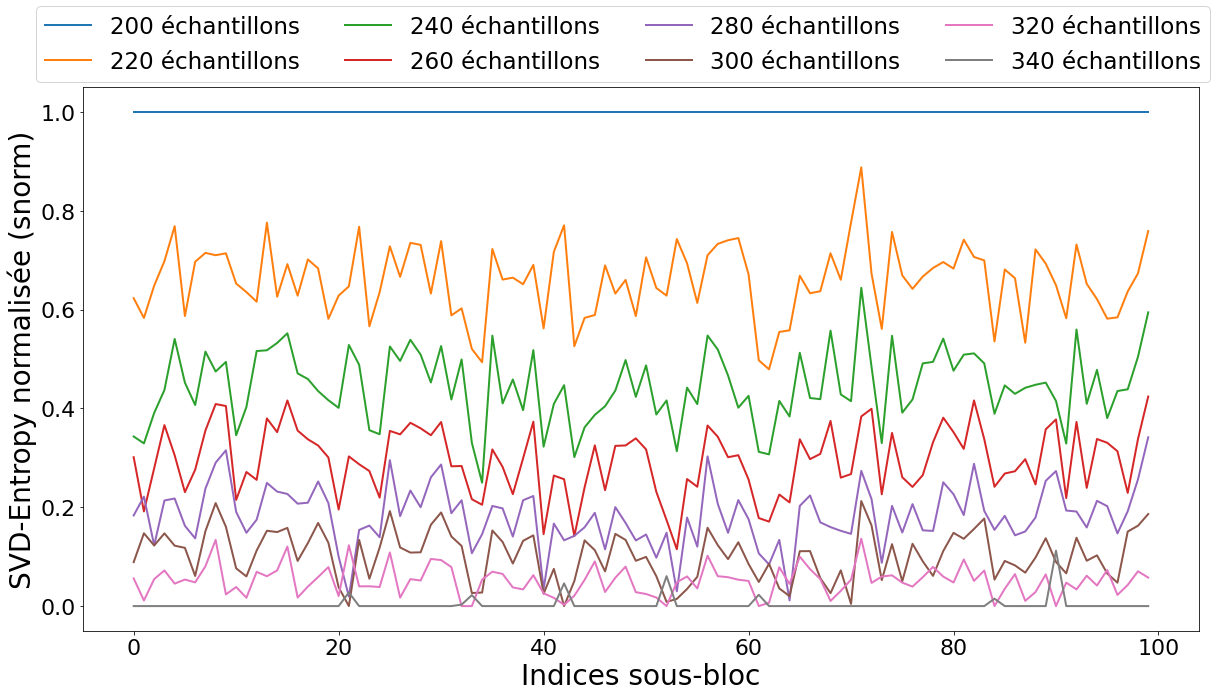

In [220]:
# before problem
display_svd_block_seq(10, bathroom_blocks[9], 8, "bathroom_bloc10_before_problem.png")

Data are in range [1040, 1220[


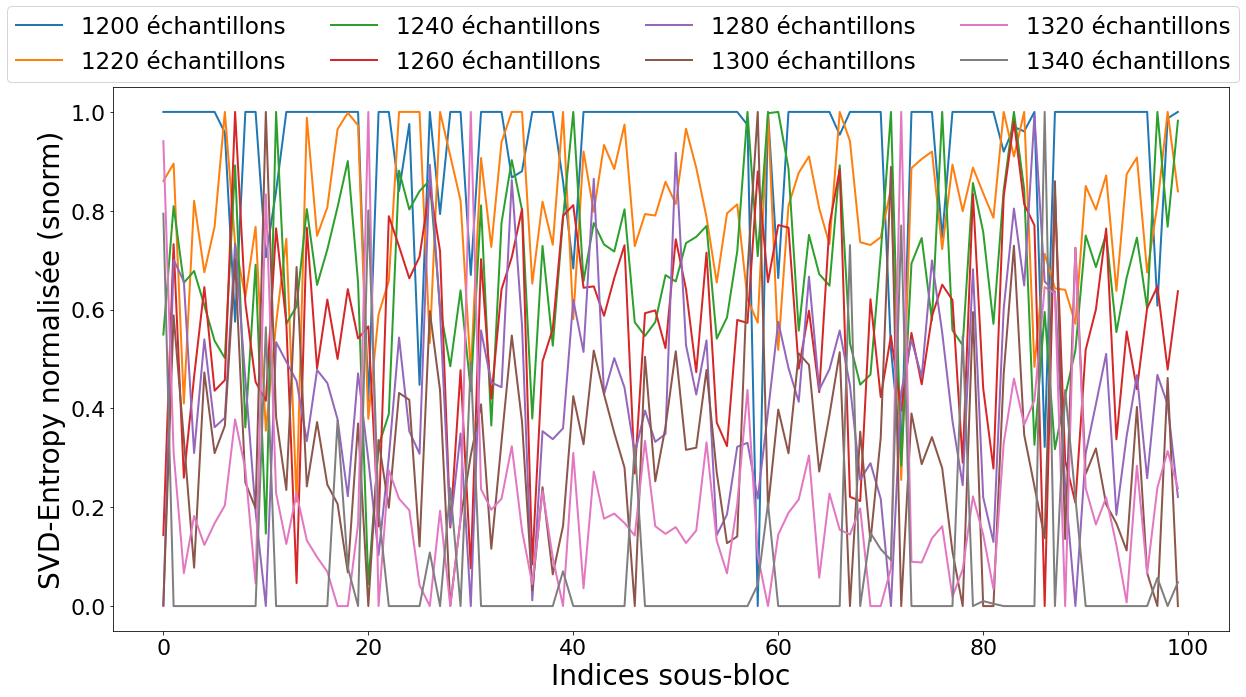

In [221]:
# after problem
display_svd_block_seq(60, bathroom_blocks[9], 8, "bathroom_bloc10_after_problem.png")

### Arcsphere study

Data are in range [440, 620[


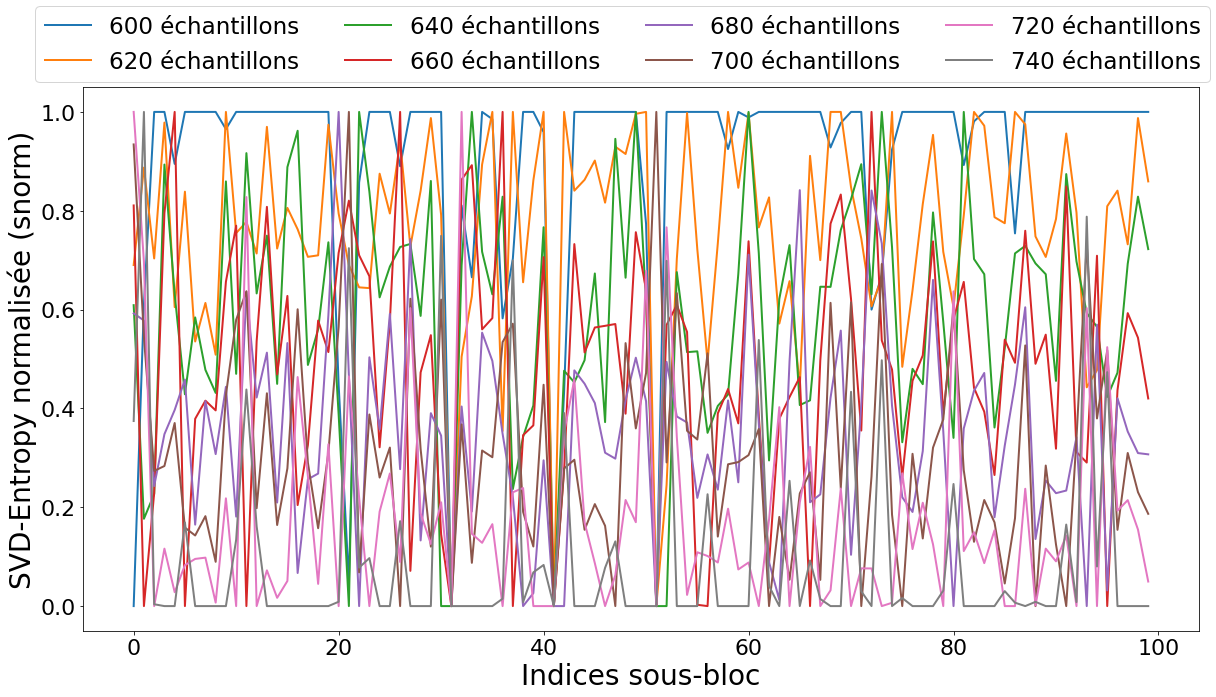

In [216]:
# Threshold @2520
display_svd_block_seq(30, arc_blocks[7], 8, "arcsphere_bloc8_before_threshold.png")

Data are in range [3440, 3620[


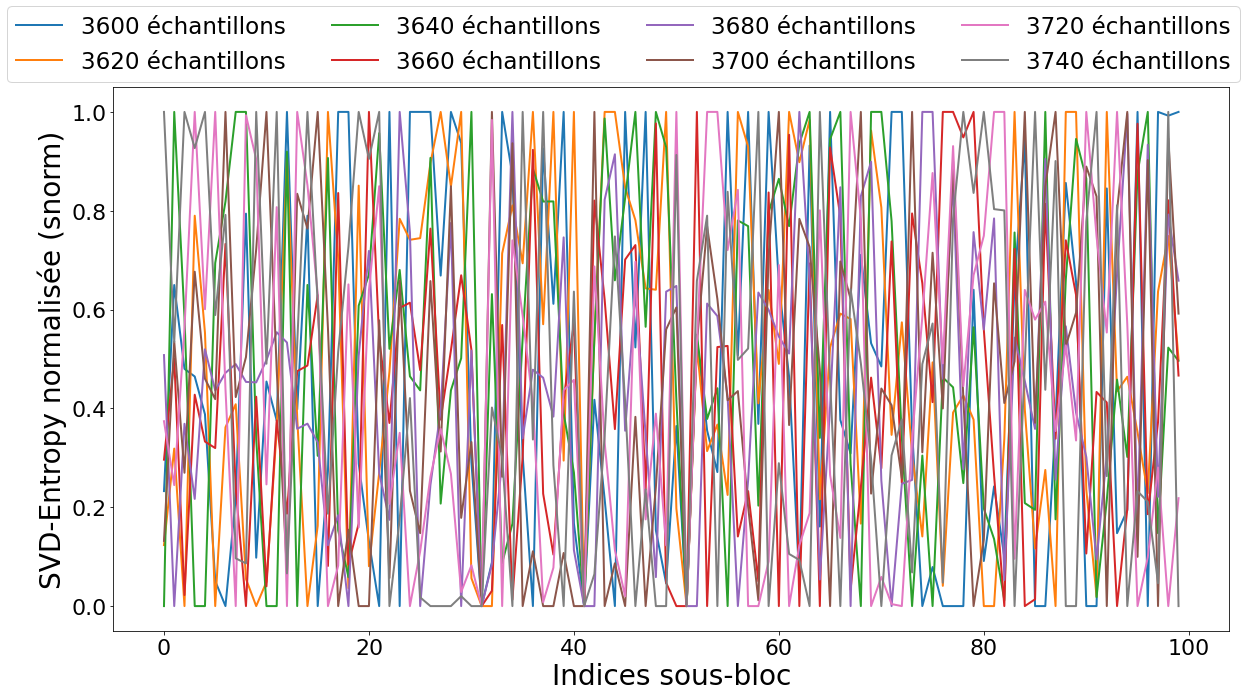

In [217]:
display_svd_block_seq(180, arc_blocks[7], 8, "arcsphere_bloc8_after_threshold.png")

Data are in range [2240, 2420[


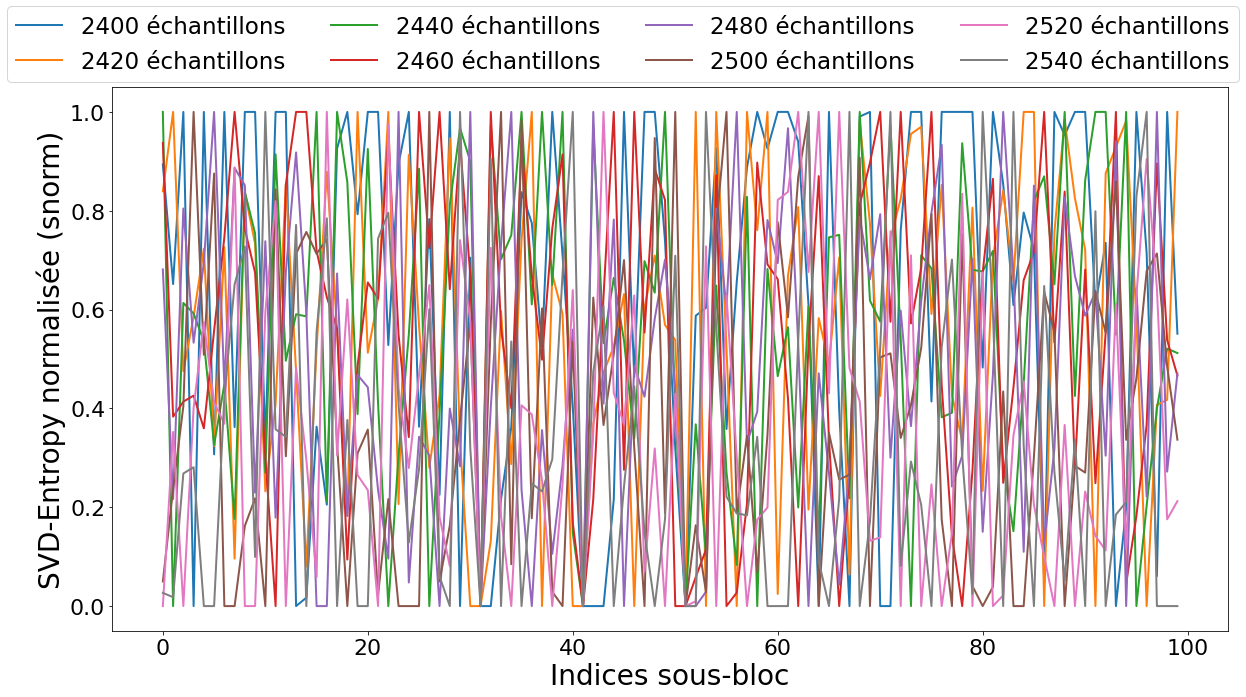

In [218]:
display_svd_block_seq(120, arc_blocks[7], 8, "arcsphere_bloc8_during_threshold.png")